## Regularization
**Regularization** is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

![alt-текст](images/overfitting.png)
![alt-текст](images/overfitting_2.png)

## Ridge regression

While ordinary least squares regression is a good way to fit a linear model onto a dataset, it relies on the fact that the dataset's features are each independent, i.e. uncorrelated. When many of the dataset features are linearly correlated, e.g. if a dataset has multiple features depicting the same price in different currencies, it makes the least squares regression model highly sensitive to noise in the data.

Because real life data tends to have noise, and will often have some linearly correlated features in the dataset, we combat this by performing regularization.

For ordinary least squares regression, the goal is to find the weights (coefficients) for the linear model that minimize the sum of squared residuals:

$$
    \sum\limits_{i=1}^{n} (x_iw - y_i)^2
$$

where each xi represents a data observation and yi is the corresponding label.

For regularization, the goal is to not only minimize the sum of squared residuals, but to do this with coefficients as small as possible. The smaller the coefficients, the less susceptible they are to random noise in the data. The most commonly used form of regularization is ridge regularization.

With ridge regularization, the goal is now to find the weights that minimize the following quantity:

$$
    \alpha \Vert w \Vert^2_2 + \sum\limits_{i=1}^{n} (x_iw - y_i)^2
$$

where α is a non-negative real number hyperparameter and ||w||2 represents the L2 norm of the weights. 

![alt-текст](images/ridge_vs_ols.png)

In [83]:
from sklearn import linear_model
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [84]:
# OLS
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)

0.7406426641094095
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [85]:
# Ridge
reg = linear_model.Ridge(alpha=0.1)
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)

0.7406002922228037
[-1.07473720e-01  4.65716366e-02  1.59989982e-02  2.67001859e+00
 -1.66846452e+01  3.81823322e+00 -2.69060598e-04 -1.45962557e+00
  3.03515266e-01 -1.24205910e-02 -9.40758541e-01  9.36807461e-03
 -5.25966203e-01]


## Lasso regression

Only difference between Ridge and Lasso:
$$
    \alpha \Vert w \Vert^2_1 + \sum\limits_{i=1}^{n} (x_iw - y_i)^2
$$

LASSO regularization tends to prefer linear models with fewer parameter values. This means that it will likely zero-out some of the weight coefficients. This reduces the number of features that the model is actually dependent on (since some of the coefficients will now be 0), which can be beneficial when some features are completely irrelevant or duplicates of other features.

In [86]:
# Lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X, y)
print(reg.score(X, y))
print(reg.coef_)

0.7269834862602695
[-0.09789363  0.04921111 -0.03661906  0.95519003 -0.          3.70320175
 -0.01003698 -1.16053834  0.27470721 -0.01457017 -0.77065434  0.01024917
 -0.56876914]


## Logistic regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

![alt-текст](images/log_reg.jpg)

In [95]:
import numpy as np

# Logistic function aka sigmoid
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

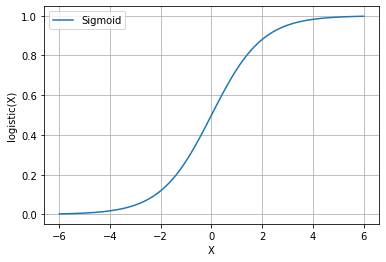

In [88]:
# Lets look at it
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1000)
y = [logistic(x) for x in X]

plt.plot(X, y, label='Sigmoid')
plt.xlabel('X')
plt.ylabel('logistic(X)')
plt.grid()
plt.legend()
plt.show()

Model we will predict, described as:
$$
    y_i = f(x_i, \beta) + \varepsilon_i
$$

In case of OLS we minimize residual sum of squares (RSS):
$$
    \varepsilon_i^2 = \sum\limits_{i=1}^{n} (y_i - f(x_i, \beta))^2
$$

Here we will do the same procedure using gradient descent method.
![alt-текст](images/grad_desc.jpg)

According to our model, given beta y_i equals 1 with p = f(x_i, beta) and 0 with q = 1 - f(x_i, beta)

So we can write down the probability density function:

$$
    p(y_i \ | \ x_i, \beta) = f(x_i, \beta)^{y_i} \ (1 - f(x_i, \beta))^{1-y_i}
$$

We usually call **p** as likelihood.

$$
    L(y_i \ | \ x_i, \beta) = p(y_i \ | \ x_i, \beta)
$$

It is simpler to maximize not the likelihood itself but the logarithm of likelihood because of logarithm features.

$$
    lnL(y_i \ | \ x_i, \beta) = y_i ln(f(x_i, \beta)) + (1 - y_i) ln(1 - f(x_i, \beta))
$$

In [89]:
def logistic_log_likelihood_i(x_i, y_i, beta):
    # x_i - observation (i.e. vector with values for each feature)
    if y_i == 1:
        return np.log(logistic(np.dot(x_i, beta)))
    else:
        return np.log(1 - logistic(np.dot(x_i, beta)))
    
def logistic_log_likelihood(x, y, beta):
    # x - the whole input
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))

def logistic_log_partial_ij(x_i, y_i, beta, j):
    return (y_i - logistic(np.dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    return np.array([logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)])

def logistic_log_gradient(x, y, beta):
    all_gradients = np.array([logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x, y)])
    return np.sum(all_gradients, axis=0)

In [90]:
# Some stuff for gradient descent

def step(v, direction, step_size):
#     print(type(v), v)
#     print(type(direction), direction)
    return v + step_size * direction

def minimize_batch(fn, gradient_fn, beta_0, tolerance=0.01):
    step_size = 0.1
    beta = beta_0
    value = fn(beta)
    
    while True:
        gradient = gradient_fn(beta)
        next_beta = step(beta, gradient, -step_size)
        next_value = fn(next_beta)
        
        if abs(value - next_value) < tolerance:
            return beta
        else:
            beta, value = next_beta, next_value
            
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)

def maximize_batch(fn, gradient_fn, beta_0, tolerance=0.0001):
    return minimize_batch(negate(fn), negate(gradient_fn), beta_0, tolerance)

In [96]:
from sklearn.model_selection import train_test_split

data = np.array([
  [1, 0],
  [1, 1],
  [1, 2.2],
  [1, 3.9],
  [1, 4.1],
  [1, 5.3],
  [1, 7.0],
  [1, 8]])

labels = np.array(
  [0, 0, 0, 0, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [98]:
from functools import partial

# We need to maximize log likelihood
fn = partial(logistic_log_likelihood, X_train, y_train)
gradient_fn = partial(logistic_log_gradient, X_train, y_train)

beta_0 = np.random.rand(2)

beta_hat = maximize_batch(fn, gradient_fn, beta_0)

In [99]:
beta_hat

array([-8.8614562 ,  2.22157877])

In [104]:
logistic(np.dot(beta_hat, np.array([1, 0])))

0.00014172841043042327

In [103]:
logistic(np.dot(beta_hat, np.array([1, 8])))

0.999865144782208

In [106]:
def mean_squared_error(test_labels, predicted_labels):
    return np.sum([(pl - tl) ** 2 for pl, tl in zip(predicted_labels, test_labels)]) / len(test_labels)

In [107]:
y_pred = np.array([logistic(np.dot(beta_hat, np.array(x))) for x in X_test])
mean_squared_error(y_test, y_pred)

0.0013271132434006946